This notebook processes the COCO dataset, loading annotations and performing keypoint analysis.

##Loading Dataset in google colab from gdrive

In [1]:
!gdown --folder --id 1B19RWODijlUlXEdvLKxjcmlg-BiJcbWE -O /content/shared_folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7 coco2017_subset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7
From (redirected): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7&confirm=t&uuid=79c84fd4-0be6-4ff4-98f4-f4faea4e9fc4
To: /content/shared_folder/coco2017_subset.zip
100% 6.71G/6.71G [01:44<00:00, 64.3MB/s]
Download completed


In [2]:
import os
os.listdir("/content/shared_folder")

['coco2017_subset.zip']

In [3]:
!unzip /content/shared_folder/coco2017_subset.zip -d /content/extracted_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508972.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508984.jpg  
  inflating: /content/extracted_file

## Importing required libraries

In [4]:
#Importing required libraries

import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random
from skimage import io

## Configuration for the person json file

In [5]:
#Path to your COCO annotation file - json file

ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_train2017_subset.json"

#Folder where the corresponding images are stored

IMAGE_FOLDER = "/content/extracted_files/coco2017_subset/train2017"

## Loading Dataset

In [6]:
#Initializing COCO API for instance annotations

coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=2.69s)
creating index...
index created!


In [7]:
#Getting the images IDs

img_ids = coco.getImgIds()
if not img_ids:
    raise ValueError("No images found in the annotation file!")

In [8]:
#Loading the first image from the dataset

img_data = coco.loadImgs(img_ids[1])[0]

In [9]:
#Constructing the image path and load it using OpenCV

img_path = os.path.join(IMAGE_FOLDER, img_data['file_name'])
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {img_path}")

## Plotting the image

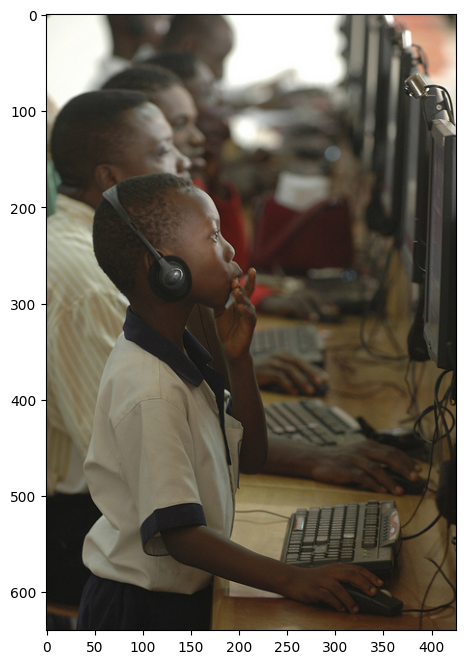

In [10]:
#Converting image from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image)

In [11]:
# Getting all category IDs
category_ids = coco.getCatIds()

# Loading category names
categories = coco.loadCats(category_ids)

# Extracting names
class_names = [category['name'] for category in categories]

print("Classes in the dataset:", class_names)

Classes in the dataset: ['person']
